# Machine Learning and its Applications
Applying ML techniques to a financial transactions dataset. 
- Prediction: Linear Regression with Mean Squared Error metric.
- Classification: Logistic Regression with a Confusion Matrix and Classification Report.
- Unsupervised ML: K-Means with Silhouette Analysis.

In [1]:
# Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load dataset
transactions = pd.read_csv('data/transactions.csv')

# Show first five rows
transactions.head()

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,1 Jan 2020,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2 Jan 2020,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,3 Jan 2020,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00
3,4 Jan 2020,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54
4,5 Jan 2020,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30


### Column Cleaning
Column cleaning is performed to ensure easier column handling when completing Task 1.

In [2]:
# Rename columns
transactions.rename(columns={'80% of the expenses were made by ': 'Sector', 
                             '80% of the expenses were made by .1': 'Gender',
                             '80% of the expenses were made in the following regions': 'Region'}, inplace=True)

# Show first five rows
transactions.head()

,Date,Sector,Gender,Region,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,1 Jan 2020,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2 Jan 2020,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,3 Jan 2020,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00
3,4 Jan 2020,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54
4,5 Jan 2020,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30


## Task 1: Exploratory Data Analysis (EDA) 
This section conducts EDA to gain insights into the dataset. 

#### Figure 1: Spending Categories over the Years

C:\Users\polin\AppData\Local\Temp\ipykernel_13272\563717709.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Spending', hue='Category', data=line_chart_sns, ci=None)


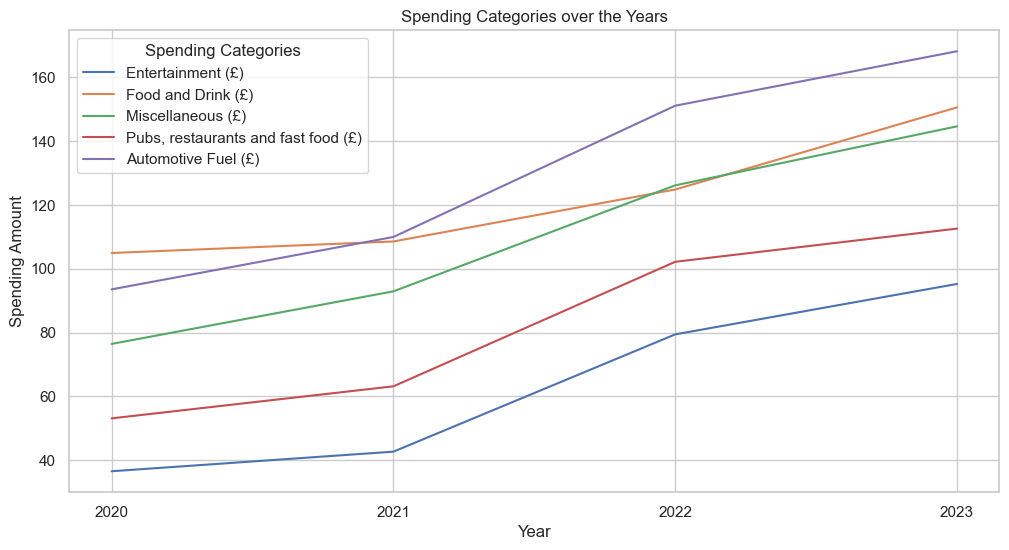

In [3]:
# Extracting the year from the 'Date' column
transactions['Year'] = pd.to_datetime(transactions['Date']).dt.year

# Selecting relevant columns for the line chart
selected_columns = ['Year', 'Entertainment (£)', 'Food and Drink (£)', 'Miscellaneous (£)', 'Pubs, restaurants and fast food (£)', 'Automotive Fuel (£)']
line_chart = transactions[selected_columns]

# Reshape the data for seaborn
line_chart_sns = pd.melt(line_chart, id_vars=['Year'], var_name='Category', value_name='Spending')

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(x='Year', y='Spending', hue='Category', data=line_chart_sns, ci=None)

# Setting the x-axis
plt.xticks(line_chart['Year'].unique().astype(int))

# Adding labels
plt.xlabel('Year')
plt.ylabel('Spending Amount')
plt.title('Spending Categories over the Years')
plt.legend(title='Spending Categories')

# Show chart
plt.show()


#### Figure 2: Spending Categories for different Genders

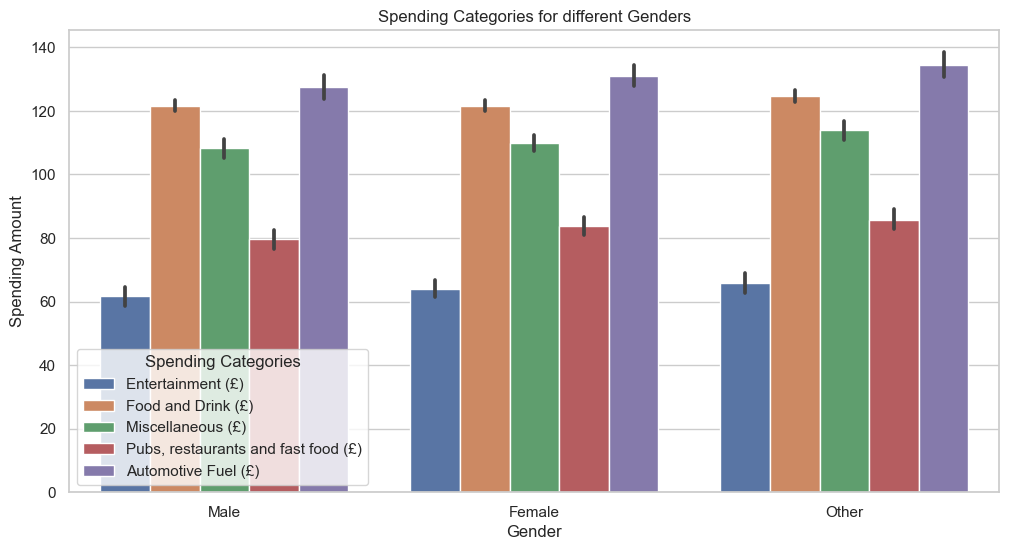

In [4]:
# Selecting relevant columns for the clustered bar chart
selected_columns = ['Gender', 'Entertainment (£)', 'Food and Drink (£)', 'Miscellaneous (£)', 'Pubs, restaurants and fast food (£)', 'Automotive Fuel (£)']
clustered_chart = transactions[selected_columns]

# Reshape the data for seaborn
clustered_chart_sns = pd.melt(clustered_chart, id_vars=['Gender'], var_name='Category', value_name='Expense')

# Plotting the clustered bar chart
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Gender', y='Expense', hue='Category', data=clustered_chart_sns)

# Adding labels
plt.xlabel('Gender')
plt.ylabel('Spending Amount')
plt.title('Spending Categories for different Genders')
plt.legend(title='Spending Categories')

# Show chart
plt.show()

#### Figure 3: Spending for different Sectors

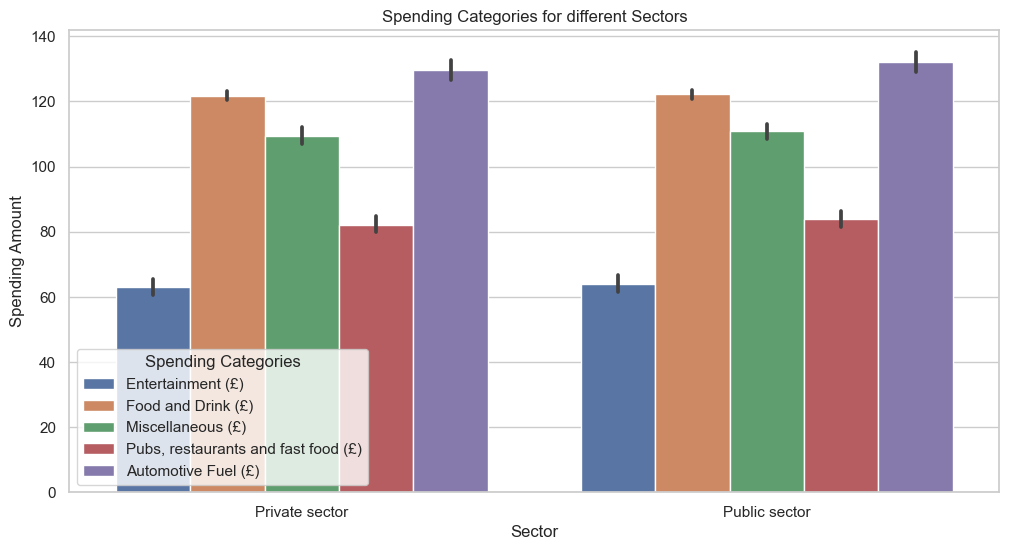

In [5]:
# Selecting relevant columns for the clustered bar chart
selected_columns = ['Sector', 'Entertainment (£)', 'Food and Drink (£)', 'Miscellaneous (£)', 'Pubs, restaurants and fast food (£)', 'Automotive Fuel (£)']
clustered_chart = transactions[selected_columns]

# Reshape the data for seaborn
clustered_chart_sns = pd.melt(clustered_chart, id_vars=['Sector'], var_name='Category', value_name='Spending')

# Plotting the clustered bar chart
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Sector', y='Spending', hue='Category', data=clustered_chart_sns)

# Adding labels
plt.xlabel('Sector')
plt.ylabel('Spending Amount')
plt.title('Spending Categories for different Sectors')
plt.legend(title='Spending Categories')

# Show chart
plt.show()

#### Figure 4: Heatmap showing regional expenses by category 

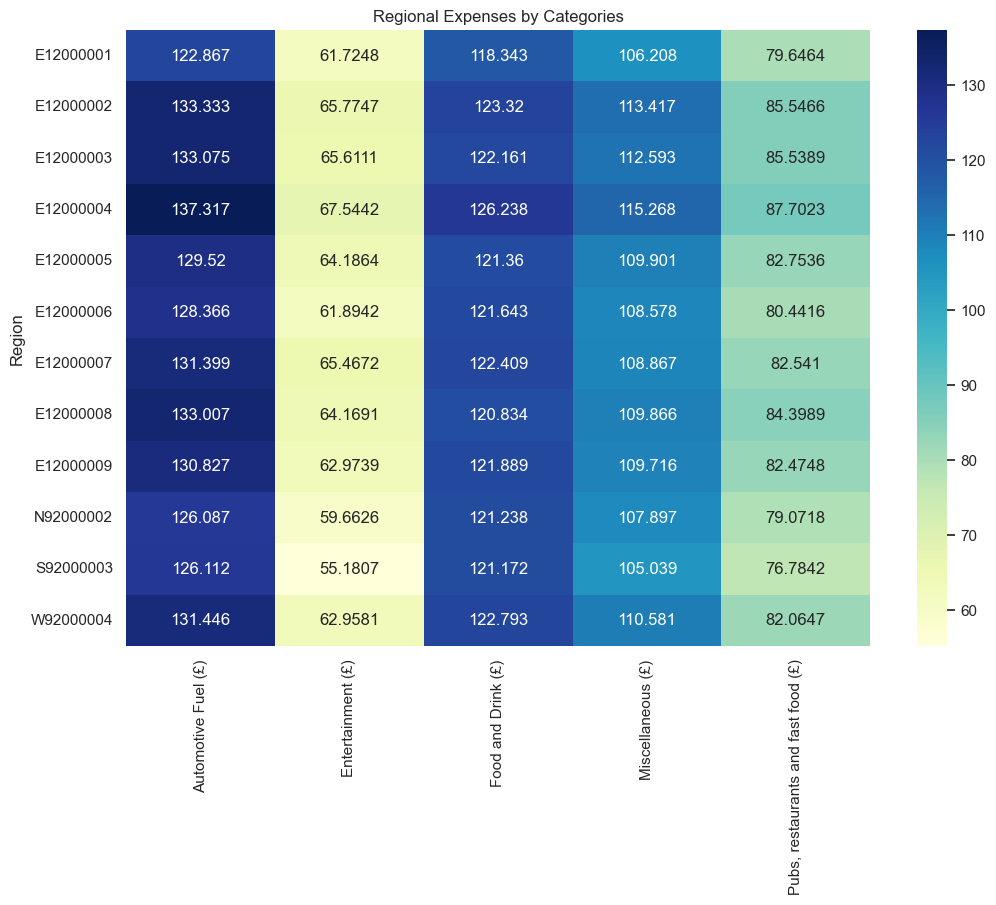

In [6]:
pivot_df = transactions.pivot_table(index='Region', values=['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Regional Expenses by Categories')
plt.ylabel('Region')
plt.show()

#### Figure 5: Heatmap showing gendered expenses by category 

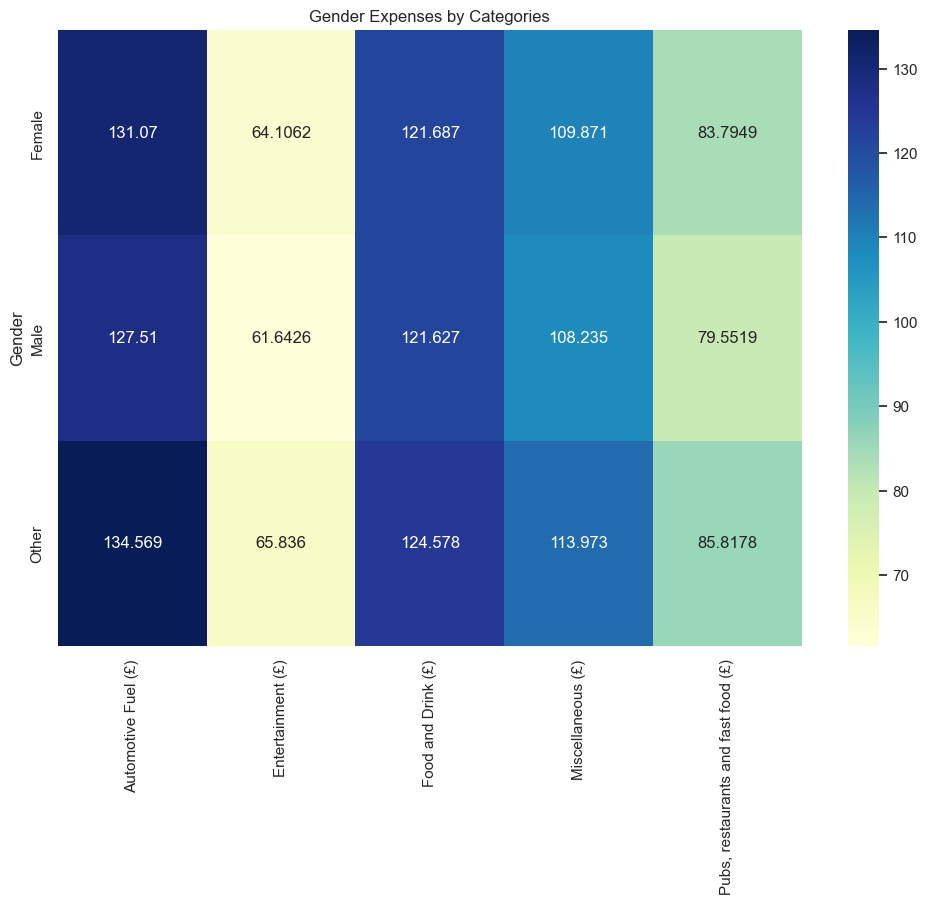

In [7]:
pivot_df = transactions.pivot_table(index='Gender', values=['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Gender Expenses by Categories')
plt.ylabel('Gender')
plt.show()

## Task 2 - Data Pre-Processing
This section applies appropriate data pre-processing techniques on the attributes.

#### Technique 1 - Mode imputation on categorical columns (Gender and Sector)

In [8]:
for col in ['Gender', 'Sector']:
    mode_val = transactions[col].mode()[0]  # Calculate mode
    transactions[col].fillna(mode_val, inplace=True)  # Replace missing values with mode

#transactions.head()

#### Technique 2 - Mean imputation on numerical columns

In [9]:
for col in ['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)']:
    mean_val = transactions[col].mean()  # Calculate mean
    transactions[col].fillna(mean_val, inplace=True)  # Replace missing values with mean

#transactions.head()

#### Technique 3 - Normalization on numerical columns

In [10]:
# Selecting numeric and non-numeric attributes
numeric_columns = ['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)']
non_numeric_columns = ['Date', 'Sector', 'Gender', 'Region']

# Min-Max scaling for numeric attributes
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(transactions[numeric_columns])
minmax_df = pd.DataFrame(minmax_data, columns=numeric_columns)

# Concatenating normalized numeric attributes with non-numeric attributes
transactions = pd.concat([transactions[non_numeric_columns], minmax_df], axis=1)

transactions.head()

,Date,Sector,Gender,Region,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,1 Jan 2020,Private sector,Male,E12000001,0.592473,0.184521,0.881649,0.151438,0.845166
1,2 Jan 2020,Private sector,Female,E12000007,0.620257,0.192197,0.910909,0.205025,0.867057
2,3 Jan 2020,Private sector,Female,E12000006,0.621181,0.200157,0.899516,0.207184,0.867285
3,4 Jan 2020,Private sector,Female,E12000004,0.610713,0.206659,0.840423,0.211404,0.848586
4,5 Jan 2020,Private sector,Female,E12000003,0.591318,0.206289,0.765757,0.202670,0.801155


## Task 3 - Supervised ML Algorithm: Prediction

#### Linear Regression Model
- Linear regression model is used to predict the Miscellaneous expenses.
- For evaluating the performance of the regression model, I used the Mean Squared Error (MSE) metric.

In [11]:
# Ignore the Date attribute and select other attributes
selected_columns = ['Sector', 'Gender', 'Region', 'Miscellaneous (£)', 'Automotive Fuel (£)', 
                    'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)']
transactions_subset = transactions[selected_columns]

# Encode categorical columns using one-hot encoding
categorical_columns = ['Sector', 'Gender', 'Region']
encoded_data = pd.get_dummies(transactions_subset, columns=categorical_columns)

# Split the data into features and target variable
X = encoded_data.drop('Miscellaneous (£)', axis=1)
y = encoded_data['Miscellaneous (£)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Miscellaneous (£) expenses
y_pred = model.predict(X_test)

# Evaluate model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Print predicted and actual values of Miscellaneous expenses for the test data
# print("\nPredicted Miscellaneous (£) Expenses:")
# print(y_pred)
# print("\nActual Miscellaneous (£) Expenses:")
# print(y_test.values)

Mean Squared Error (MSE): 0.003405256762138465


#### MSE Metric Summary: 
- The MSE represents the average squared difference between the predicted Miscellaneous (£) expenses and the actual Miscellaneous (£) expenses in the test dataset. In other words, on average, the squared difference between the predicted and actual expenses is 0.003405256762138465.
- A low MSE value means that the model's predictions are close to the actual values, the linear regression model has effectively captured the underlying relationship between the independent variables and the target variable, Miscellaneous (£)

#### Figure 6: Scatter Plot for Predicted vs Actual Values for Linear Regression Model

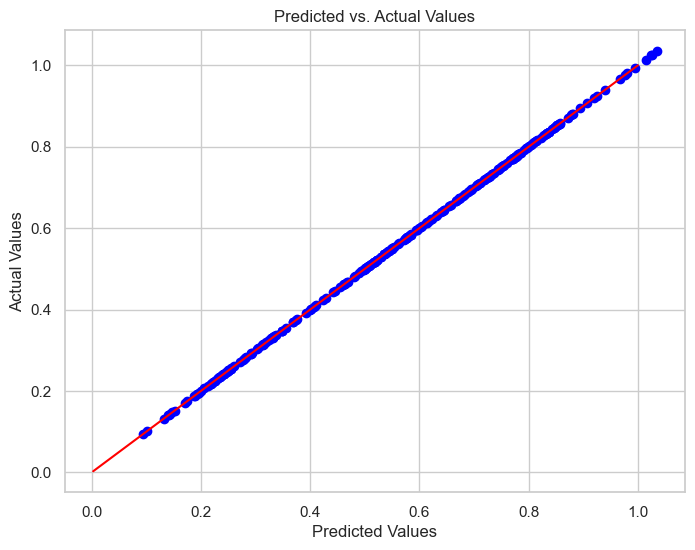

In [12]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_pred, color='blue')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Linear Regression Model Summary: 
- The diagonal red line represents perfect predictions where predicted values equal actual values. As the points lay very closely to the red diagonal line, this indicates that the predicted values are close to the actual values.
- Additionally, the scatter plot reveals that the predicted values generally increase linearly with the actual values, indicating that the linear regression algorithm captures the underlying trend in the data.
- The distribution of points indicates that the model's performance is relatively stable across the dataset, with no systematic bias toward overestimation or underestimation.

## Task 4 - Supervised ML Algorithm: Classification

#### Logisitc Regression

- Logistic Regression is used as a classification model.
- For evaluating the performance, a confusion matrix and classification report is produced.

In [13]:
# Drop irrelevant columns and select input variables and target variable
selected_columns = ['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)', 'Gender']
data_subset = transactions[selected_columns]

# Prepare the data
X = data_subset.drop('Gender', axis=1)
y = data_subset['Gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model
classifier = LogisticRegression()

# Train the model
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[84 27  0]
 [75 39  0]
 [53 12  0]]

Classification Report:
              precision    recall  f1-score   support

      Female       0.40      0.76      0.52       111
        Male       0.50      0.34      0.41       114
       Other       0.00      0.00      0.00        65

    accuracy                           0.42       290
   macro avg       0.30      0.37      0.31       290
weighted avg       0.35      0.42      0.36       290



C:\Users\polin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Classification Report Summary:
- It can be seen that the model has poor performance due to the accuracy being 42%. This means that it correctly predicts only 42% of the instances in the test set.
- The low precision, recall and f-1 score for Other are all very low. This indicates that the model fails to correctly classify instances belonging to the Other class.
- Another point to consider is that there is a class imbalance. For example, the Other class has fewer instances compared to the Male and Female classes. This means this can affect the model's ability to correctly generalise all the classes.

#### Figure 7: Heatmap for Confusion Matrix

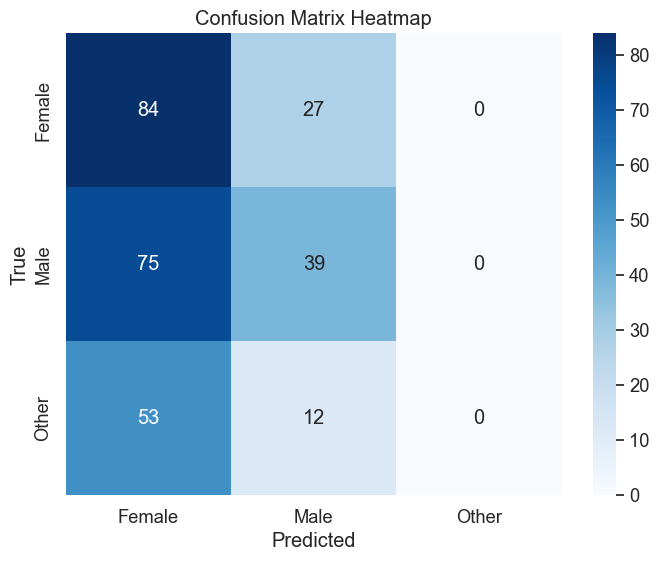

In [14]:
# Confusion matrix data
conf_matrix = [[84, 27, 0],
               [75, 39, 0],
               [53, 12, 0]]

# Define class labels
class_labels = ['Female', 'Male', 'Other']

# Create heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


#### Confusion Matrix Summary:
- The confusion matrix on a heatmap allows clear visualisation of the number of instances predicted for a particular gender class compared to the true gender class. The darker colours indicate the frequency of correct and incorrect predictions.
- This confusion matrix reveals that the logistic regression model has misclassified instances across all classes, with a significant number of false positives and false negatives. This can be seen by the darker colours between True Male and Predicted Female, or True Other and Predicted Female. 

## Task 5 - Unsupervised ML algorithm

- K-means is used as a clustering algorithm
- Silhouette analysis is used to determine optimal number of clusters

In [15]:
# Selecting a subset
subset = transactions[['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)']]

# First 50 tuples
subset = subset.head(50)

# Number of clusters
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(subset)

# Add the cluster labels to the subset dataframe
subset['Cluster'] = clusters

# Display the clusters
print(subset)


C:\Users\polin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    Miscellaneous (£)  Automotive Fuel (£)  Entertainment (£)  \
0            0.592473             0.184521           0.881649   
1            0.620257             0.192197           0.910909   
2            0.621181             0.200157           0.899516   
3            0.610713             0.206659           0.840423   
4            0.591318             0.206289           0.765757   
5            0.548526             0.196525           0.709204   
6            0.561109             0.186543           0.691829   
7            0.516278             0.188305           0.680928   
8            0.480489             0.174517           0.468747   
9            0.429231             0.113387           0.654782   
10           0.434850             0.132677           0.591755   
11           0.423613             0.120281           0.588149   
12           0.479874             0.118650           0.759692   
13           0.406988             0.112496           0.575117   
14           0.403371    

#### Figure 8: Silhouette Analysis 

C:\Users\polin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\polin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

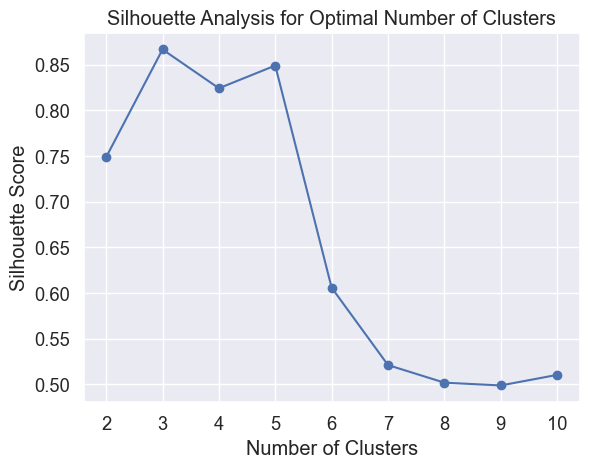

In [16]:
# To store silhouette scores
silhouette_scores = []

# Define the range of clusters to evaluate
num_clusters_range = range(2, 11)

for num_clusters in num_clusters_range:
    # Applying K-means 
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(subset)
    # Applying Silhouette Analysis
    silhouette_avg = silhouette_score(subset, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()


#### Silhouette Analysis Summary:
- Silhouette analysis has been used to show the optimal number of clusters for the category columns. The silhouette score determines the number of clusters. 
